In [2]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import scipy


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train_set.mat to train_set.mat


In [4]:
train_set = scipy.io.loadmat("train_set", mdict = None, appendmat = True)
train_set


{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Apr 10 23:29:46 2023',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[ 39,  44,  53, ...,  29,  26,  29],
        [ 63,  53,  35, ...,  41,  10,  24],
        [ 64,  76,  80, ...,  35,  37,  39],
        ...,
        [111, 114, 112, ...,  88,  86,  92],
        [110, 112, 113, ...,  92,  87,  90],
        [111, 111, 110, ...,  88,  79,  90]], dtype=uint8),
 'labels': array([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
          2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
          8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
         10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
         12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
         14, 14, 14, 14, 14, 14, 14, 14,

In [5]:
from google.colab import files
uploaded = files.upload()

Saving test_set.mat to test_set.mat


In [6]:
test_set = scipy.io.loadmat("test_set", mdict = None, appendmat = True)
test_set


{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Apr 10 23:29:46 2023',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[ 48,  49,  45, ...,  47,  46,  46],
        [ 60,  60,  62, ...,  32,  34,  34],
        [140, 134, 135, ...,  25,  26,  49],
        ...,
        [131, 128, 126, ...,  41,  40,  35],
        [105, 102, 106, ...,  72,  62,  75],
        [100, 110, 107, ...,  64,  71,  59]], dtype=uint8),
 'labels': array([[ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,
          8,  8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15,
         16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23,
         24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31,
         32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39]],
       dtype=int32)}

Visualizing one image for each label/identity in the training set

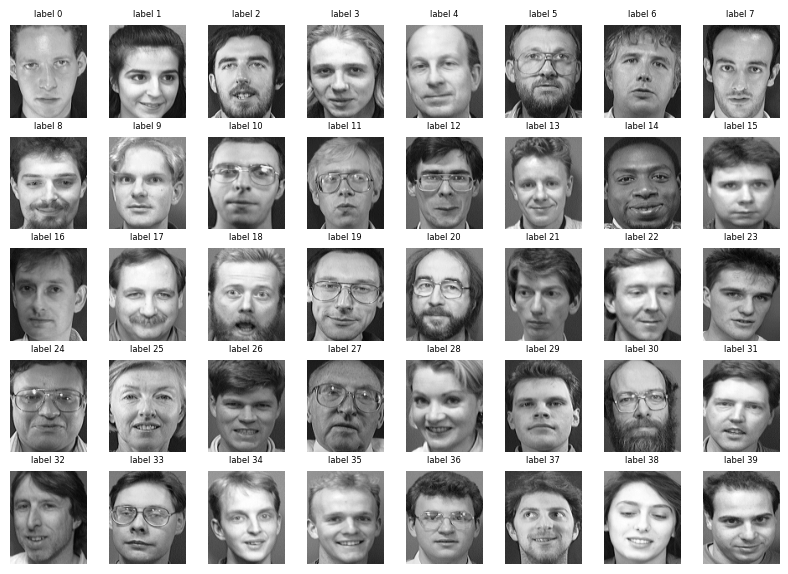

In [7]:

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 5
columns = 8
for i in range(0,320,8):
  t = np.reshape(train_set['data'][i],(112,92))
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, ((int)(i/8) + 1))
  # showing image
  plt.imshow(t, cmap ='gray')
  plt.title("label " +  str((int)(i/8)), size = 6)
  plt.axis('off')




Visualising each image in the test_set

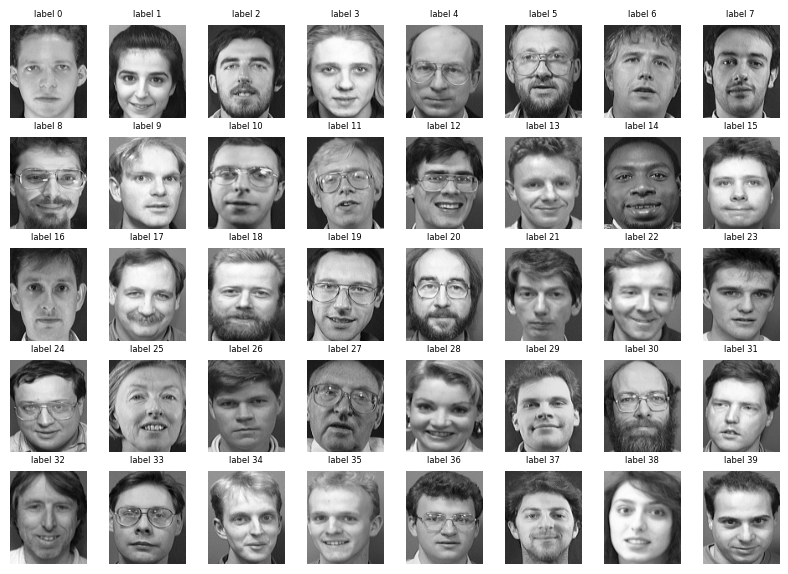

In [90]:

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 5
columns = 8
for i in range(0,80,2):
  t = np.reshape(test_set['data'][i],(112,92))
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, ((int)(i/2) + 1))
  # showing image
  plt.imshow(t, cmap ='gray')
  plt.title("label " +  str((int)(i/2)), size = 6)
  plt.axis('off')

Finding the mean image of the training set

Text(0.5, 1.0, 'MEAN_IMAGE OF TRAINING SET')

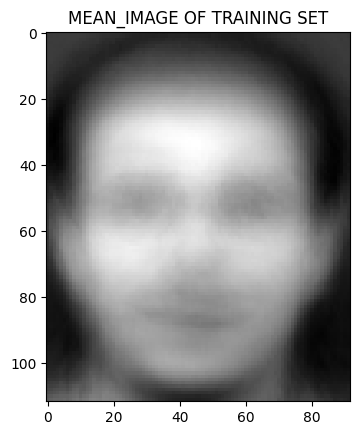

In [9]:
means = np.mean(train_set['data'],axis = 0)
stdev = np.std(train_set['data'],axis = 0)
mean_image = np.reshape(means, (112,92))
plt.imshow(mean_image,cmap ='gray')
plt.title("MEAN_IMAGE OF TRAINING SET")

Centering the whole data set


In [10]:
centered_train_data = np.zeros((320,10304))
centered_test_data = np.zeros((80,10304))
for i in range(320):
  centered_train_data[i] += (train_set['data'][i] - means)
for i in range(80):
  centered_test_data[i] +=  (test_set['data'][i] - means)

Visualsing the centered training set

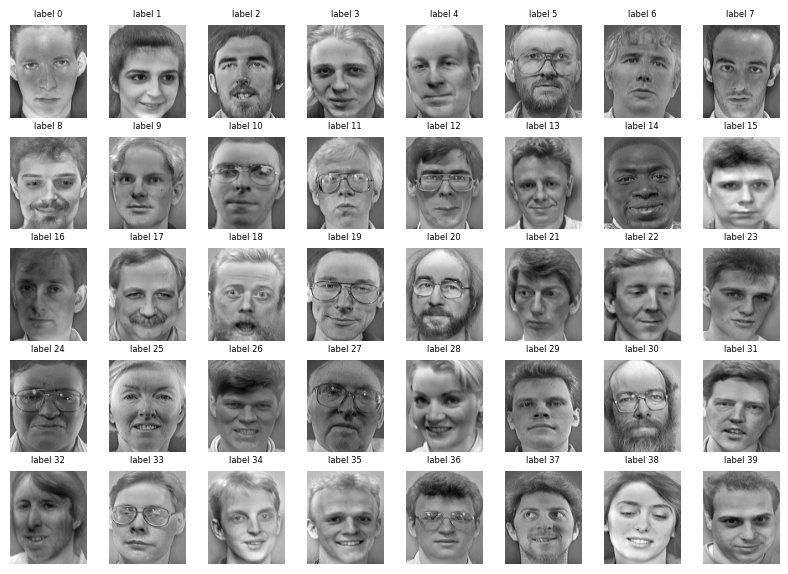

In [11]:
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 5
columns = 8
for i in range(0,320,8):
  t = np.reshape(centered_train_data[i],(112,92))
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, ((int)(i/8) + 1))
  # showing image
  plt.imshow(t, cmap = "gray")
  plt.title("label " +  str((int)(i/8)), size = 6)
  plt.axis('off')

Visualising the centered test set

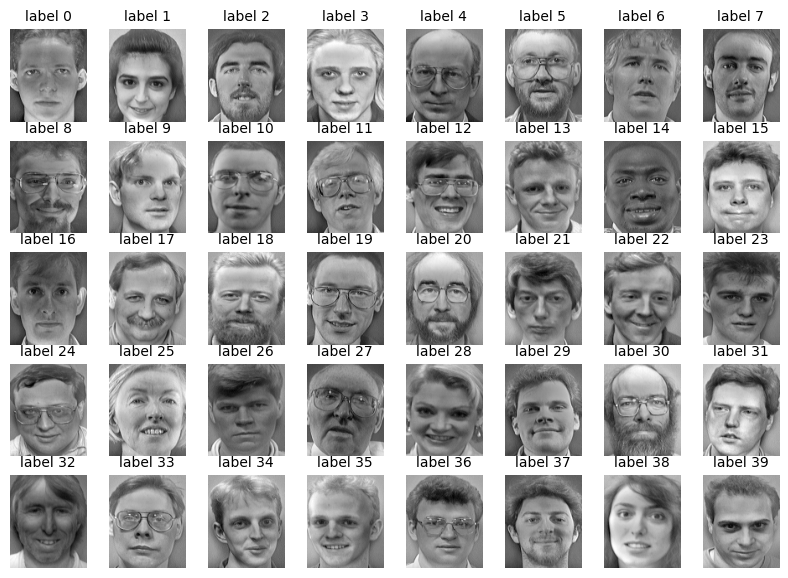

In [91]:
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 5
columns = 8
for i in range(0,80,2):
  t = np.reshape(centered_test_data[i],(112,92))
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, ((int)(i/2) + 1))
  # showing image
  plt.imshow(t, cmap = "gray")
  plt.title("label " +  str((int)(i/2)), size = 10)
  plt.axis('off')

Findig eigen vectors of covariance matrix of centered_training_set


In [13]:
covariance = (centered_train_data.T @ centered_train_data)/ centered_train_data.shape[0]
covariance.shape
# Since finding eigen vectors of 10304 * 10304 matrix is too complex even for a computer, we are finding the eigen vectors in the below following way

(10304, 10304)

Let X ∈ R N×D be a centered data matrix with N data points. Let vj be the j − th
eigenvector of XXT
.The j − th principal component is along XT
vj
.This approach for finding the principal components is preferable over eigen decomposition
of the covariance matrix when D > N


In [56]:
covar = (centered_train_data @ centered_train_data.T)/320
eigen_values , eigen_vectors = np.linalg.eigh(covariance)


In [59]:
# eigen_vectors in columns in ascending order
eigen_vectors_order = eigen_vectors[:,::-1] # flipping in descending order
eigen_values_order = eigen_values[::-1]
#eigen_faces = (np.dot(centered_train_data.T,eigen_vectors)).T   # principle_components
#print(eigen_faces.shape)
#normalized_eigen_faces = eigen_faces/ np.linalg.norm(eigen_faces, axis = 0) 
#eigen_vectors = eigen_vectors.T

In [60]:
eigen_vectors_order[:5]

array([[ 0.00133785, -0.01462058, -0.01818825, ...,  0.        ,
        -0.        ,  0.        ],
       [ 0.00133181, -0.0144725 , -0.01826696, ...,  0.22211665,
         0.37117144, -0.2081487 ],
       [ 0.00138743, -0.01450587, -0.01807086, ..., -0.36739404,
         0.33220772,  0.40898063],
       [ 0.00146925, -0.01458946, -0.01828916, ...,  0.36538352,
        -0.28295005,  0.32860456],
       [ 0.00134757, -0.01457466, -0.01815938, ..., -0.25378774,
        -0.36623836, -0.34596835]])

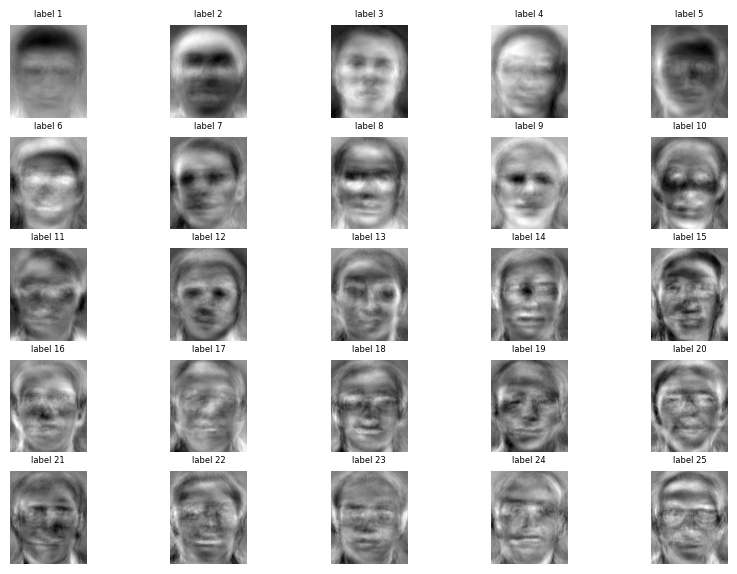

In [64]:

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 5
columns = 5
for i in range(0,25):
  t = np.reshape(eigen_vectors_order[:,i],(112,92))
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns,i + 1)
  # showing image
  plt.imshow(t, cmap = "gray")
  plt.title("label " +  str(i + 1), size = 6)
  plt.axis('off')

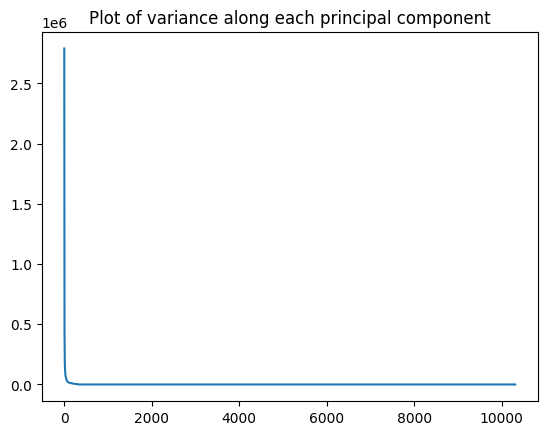

In [66]:
x = np.linspace(1,10304,10304)
plt.plot(x.reshape(-1,1), eigen_values_order.reshape(-1,1))
plt.title("Plot of variance along each principal component")
plt.show()

Since we cannot deduce anything from this , I'm drawing the plot only for 1000 eigen values

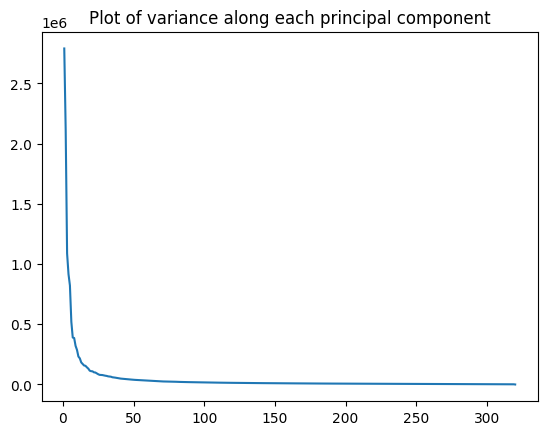

In [68]:
x = np.linspace(1,320,320)
plt.plot(x.reshape(-1,1), eigen_values_order[:320].reshape(-1,1))
plt.title("Plot of variance along each principal component")
plt.show()

• Sort the variance along each principal component in descending order and plot them. How many
principal components do you need to capture 95% of the total variance? Let’s call this number
‘k’. If the variance along i − th principal component is given by λi
, then k is the smallest number
for which
(sum of first k eigen values)/( sum of all the eigen values) ≥ 0.95.
 Here k is the maximum number of principal components

In [70]:
eigen_total_sum =  np.sum(eigen_values_order)
eigen_sum = 0
k = 0
for i in range(10304):
  eigen_sum += eigen_values_order[i]
  if ( eigen_sum >= 0.95* eigen_total_sum):
    k = i + 1
    break

d = 10304 # since d is the number of eigen values of covariance matrix, it will be the maximum number of principal components
print(d) # total data points
print(k) # no of eigen vectors that contribute to 95 % of variance



10304
164


Reconstruction of data

In [71]:
print(centered_train_data.shape)

(320, 10304)


In [79]:

z_train = (centered_train_data @ eigen_vectors_order[:,:k] )
print(z_train.shape)
z_test =  (centered_test_data @ eigen_vectors_order[:,:k])
print(z_test.shape)
reconstructed_train_data = (z_train @ eigen_vectors_order[:,:k].T) + means
print(reconstructed_train_data.shape)
reconstructed_test_data = (z_test @ eigen_vectors_order[:,:k].T) + means
print(reconstructed_test_data.shape)

(320, 164)
(80, 164)
(320, 10304)
(80, 10304)


Reconstructed training data

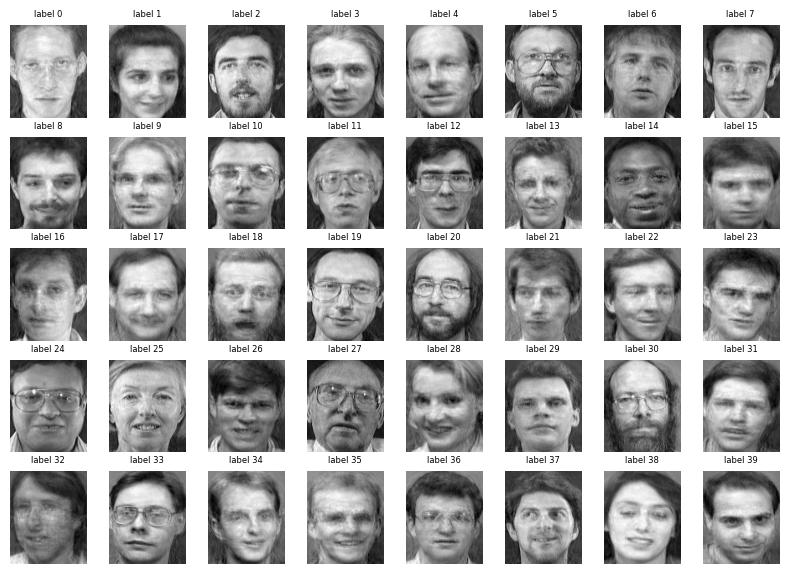

In [80]:
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 5
columns = 8
for i in range(0,320,8):
  t = np.reshape(reconstructed_train_data[i],(112,92))
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, ((int)(i/8) + 1))
  # showing image
  plt.imshow(t, cmap ='gray')
  plt.title("label " +  str((int)(i/8)), size = 6)
  plt.axis('off')


Reconstructed test data

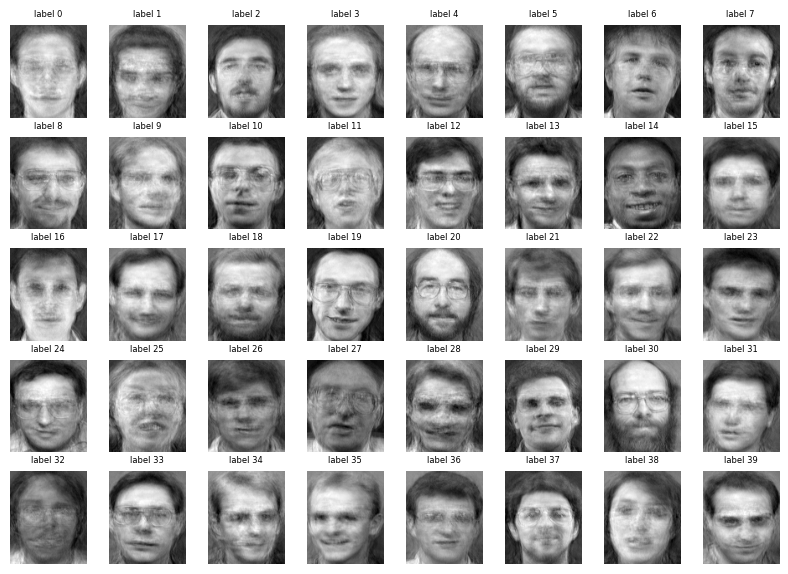

In [92]:
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 5
columns = 8
for i in range(0,80,2):
  t = np.reshape(reconstructed_test_data[i],(112,92))
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, ((int)(i/2) + 1))
  # showing image
  plt.imshow(t, cmap ='gray')
  plt.title("label " +  str((int)(i/2)), size = 6)
  plt.axis('off')

In [112]:
test_nearer = [np.argmin(np.linalg.norm(i - z_train, axis = 1)) for i in z_test]
test_nearer = np.array(test_nearer)

Does this accuracy change if you increase or decrease k?

If we decrease k, underfiiting will occur, since principal components will take less than 95 % variance, there is a chance of underfitting the data
If we increase k, overfitting will occur since principal components will take lot more than 95 % variance, there is a chance of overfitting the data
k = 164 explains > 95 % variance, hence it is a good measure



In [123]:
correct_pred = 0

for i in range(0,80):
  if ( test_set["labels"].T[i] == train_set["labels"].T[test_nearer[i]]):
    correct_pred += 1

Accuracy = correct_pred/80
print(Accuracy*100)

98.75


<ipython-input-124-1d625be41838>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(2,2))


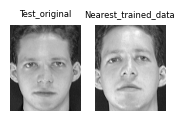

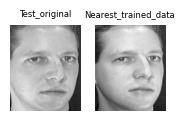

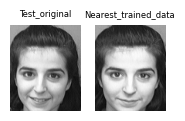

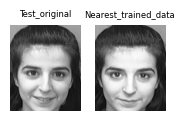

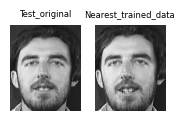

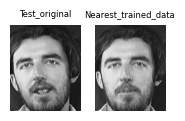

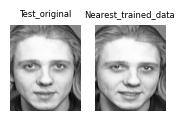

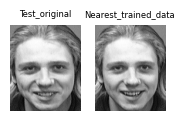

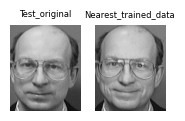

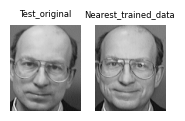

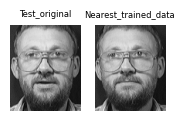

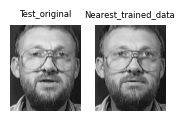

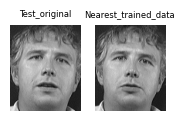

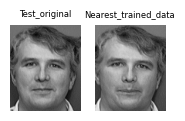

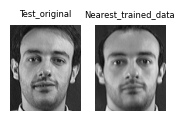

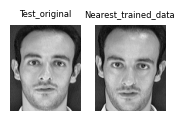

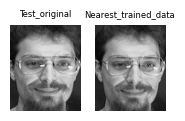

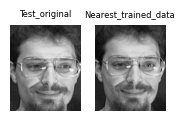

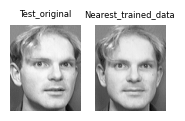

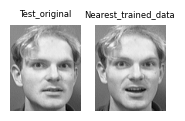

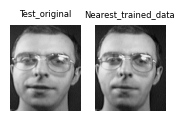

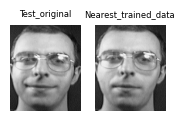

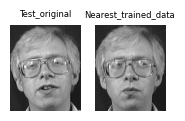

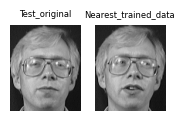

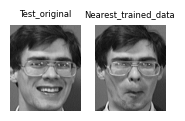

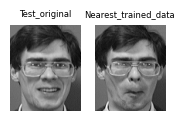

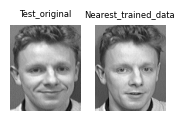

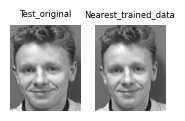

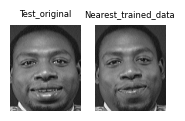

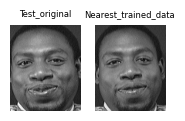

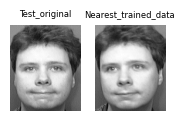

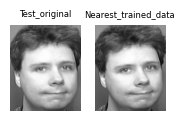

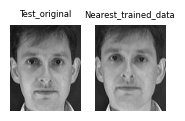

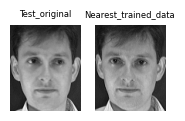

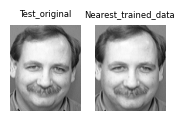

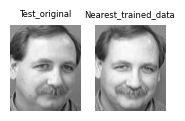

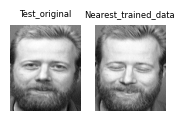

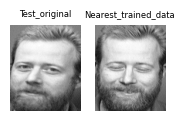

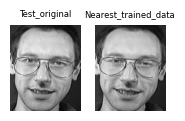

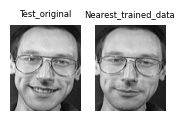

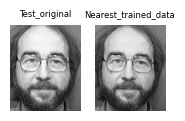

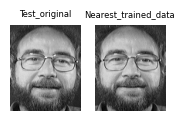

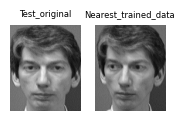

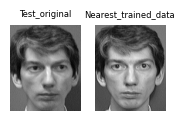

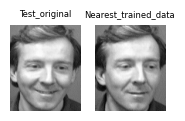

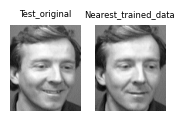

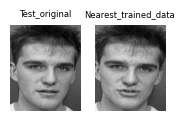

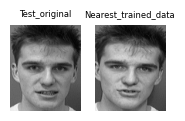

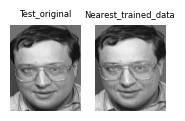

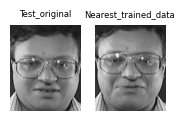

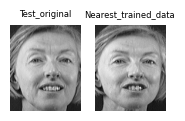

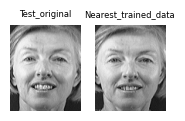

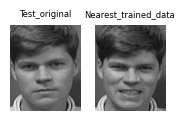

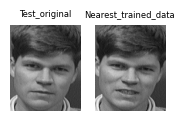

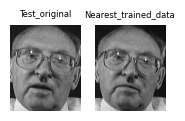

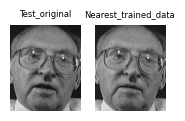

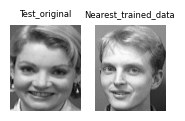

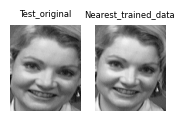

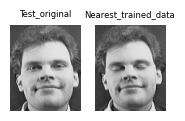

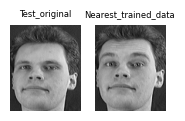

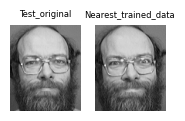

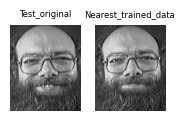

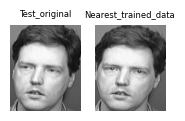

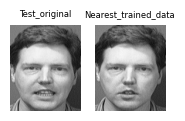

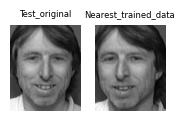

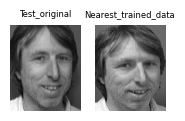

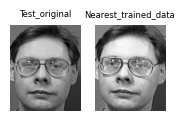

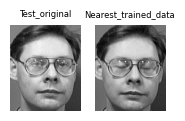

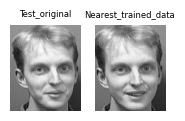

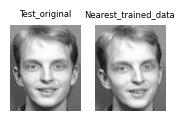

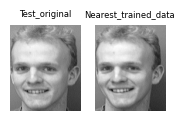

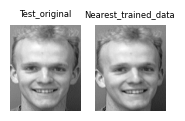

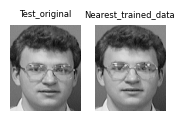

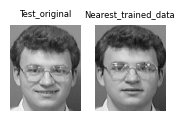

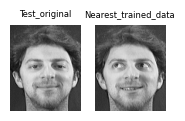

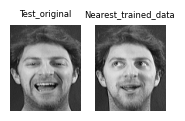

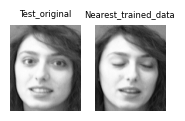

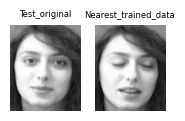

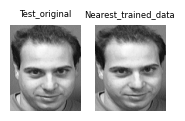

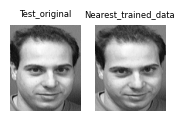

In [124]:

for i in range(0,80):
  plt.figure(figsize=(2,2))
  t = np.reshape(test_set['data'][i],(112,92))
  plt.subplot(1,2,1)
  plt.imshow(t, cmap = 'gray')
  plt.title("Test_original", size = 6)
  plt.axis('off')

  m = np.reshape(train_set['data'][test_nearer[i]],(112,92))
  plt.subplot(1,2,2)
  plt.imshow(m, cmap = 'gray')
  plt.title("Nearest_trained_data",size = 6)
  plt.axis('off')

98.75


If we decrease k, underfiiting will occur, since principal components will take less than 95 % variance, there is a chance of underfitting the data
If we increase k, overfitting will occur since principal components will take lot more than 95 % variance, there is a chance of overfitting the data
k = 164 explains > 95 % variance, hence it is a good measure